# Определение перспективного тарифа для телеком-компании

Нам предстоит сделать предварительный анализ тарифов сотовой связи федеральной телеком-компании  на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше. На основании этого вывода коллеги из коммерческого департамента компании скорректируют рекламный бюджет.  
Основными этапами нашего проекта станут:  
* Изучение предоставленных данных
* Предобработка данных
* Расчеты и добавление необходимых для анализа результатов
* Анализ данных
* Проверка гипотез
* Формулирование основных выводов

Проект выполнен в **Jupyter Notebook**, версия сервера блокнотов: 6.1.4. Версия **Python** 3.7.8.  
В проекте использованы библиотеки **Pandas**, **MatPlotLib**, **NumPy**, **Math**, **SciPy**, а также модуль **IPython**. 


# Описание тарифов

**Тариф «Смарт»**

1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

**Тариф «Ультра»**
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

## Изучение данных из файла

In [1]:
# Импортируем все библиотеки, которые пригодятся нам 
# по ходу выполнения проекта.
from math import factorial
import math as mt

import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy import stats as st
from scipy.stats import levene
# Присвоим каждому датасету отдельную переменную.
data_calls = pd.read_csv('/datasets/calls.csv')
data_internet = pd.read_csv('/datasets/internet.csv', index_col=0)
data_messages = pd.read_csv('/datasets/messages.csv')
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
data_users = pd.read_csv('/datasets/users.csv')

In [2]:
# Изучим каждый датасет. Начнем с data_calls.
display(data_calls.head(5))
data_calls.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [3]:
# Теперь data_internet.
display(data_internet.head(5))
data_internet.info()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [4]:
# Теперь data_messages.
display(data_messages.head(5))
data_messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [5]:
# Теперь data_tariffs.
display(data_tariffs)
data_tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [6]:
# Наконец data_users.
display(data_users.head(5))
data_users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Вывод

Нам предоставлены 5 датасетов. На первый взгляд датасеты находятся в отличном состоянии.

**Сформулируем идеи для предобработки данных:**

**<u>Таблица data_calls</u>**
* Переведем формат данных в столбце **call_date** в `datetime`
* Округлим данные в столбце **duration** и переведем в формат `int`

**<u>Таблица data_internet</u>**
* Переведем формат данных в столбце **session_date** в `datetime`

**<u>Таблица data_messages</u>**
* Переведем формат данных в столбце **message_date** в `datetime`

**<u>Таблица data_users</u>**
* Переведем формат данных в столбцах **reg_date** и **churn_date** в `datetime`
* Проверим столбец **city** на наличие дубликатов

## Предобработка данных

In [7]:
# Поменяем тип данных с object на datetime 
# в столбцах наших таблиц, имеющих даты.
data_calls['call_date'] = pd.to_datetime(
    data_calls['call_date'], 
    format='%Y-%m-%d'
)
data_internet['session_date'] = pd.to_datetime(
    data_internet['session_date'], 
    format='%Y-%m-%d'
)
data_messages['message_date'] = pd.to_datetime(
    data_messages['message_date'], 
    format='%Y-%m-%d'
)
data_users[['churn_date', 'reg_date']] = data_users[[
    'churn_date', 'reg_date']].apply(
    pd.to_datetime, format='%Y-%m-%d'
)

# В таблице data_calls округлим значения в столбце duration
# до целых значений и изменим формат на int.
data_calls['duration'] = np.ceil(data_calls['duration']).astype(int)
display(data_calls)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1,1499
202603,1499_216,2018-10-18,19,1499
202604,1499_217,2018-11-10,11,1499
202605,1499_218,2018-10-06,5,1499


In [9]:
# Теоретически возможно наличие дубликатов в столбце city 
# таблицы data_users. Проверим это.
display(data_users['city'].value_counts().index.sort_values())
# Дубликатов нет

Index(['Архангельск', 'Астрахань', 'Балашиха', 'Барнаул', 'Белгород', 'Брянск',
       'Владивосток', 'Владикавказ', 'Владимир', 'Волгоград', 'Волжский',
       'Вологда', 'Воронеж', 'Грозный', 'Екатеринбург', 'Иваново', 'Ижевск',
       'Иркутск', 'Казань', 'Калининград', 'Калуга', 'Кемерово', 'Киров',
       'Кострома', 'Краснодар', 'Красноярск', 'Курган', 'Курск', 'Липецк',
       'Магнитогорск', 'Махачкала', 'Москва', 'Мурманск', 'Набережные Челны',
       'Нижневартовск', 'Нижний Новгород', 'Нижний Тагил', 'Новокузнецк',
       'Новороссийск', 'Новосибирск', 'Омск', 'Оренбург', 'Орёл', 'Пенза',
       'Пермь', 'Петрозаводск', 'Подольск', 'Ростов-на-Дону', 'Рязань',
       'Самара', 'Санкт-Петербург', 'Саранск', 'Саратов', 'Севастополь',
       'Смоленск', 'Сочи', 'Ставрополь', 'Стерлитамак', 'Сургут', 'Тамбов',
       'Тверь', 'Тольятти', 'Томск', 'Тула', 'Тюмень', 'Улан-Удэ', 'Ульяновск',
       'Уфа', 'Хабаровск', 'Химки', 'Чебоксары', 'Челябинск', 'Череповец',
       'Чита', 'Я

In [10]:
# Проведем проверку данных на наличие аномалий.
# Напишем функцию describe_me, позволяющую быстро провести анализ.
# Аргументы функции:
# dataset - анализируемый датасет
# column - анализируемый столбец датасета
# units - единицы измерения данных анализируемого столбца.
def describe_me(dataset, column, units):
    display(dataset[column].describe())
    display(dataset[column].value_counts())
    dataset.plot(kind='hist', y=column, bins=70, grid=True, figsize=(15,5))
    plt.title('Гистограмма распределения данных по столбцу ' + str(column))
    plt.xlabel(units)
    plt.ylabel('Частотность')
    plt.show()
    dataset.plot(kind='box', y=column, figsize=(15,5))
    plt.title('Диаграмма размаха данных по столбцу '+ str(column))
    plt.show()

count    202607.000000
mean          7.158198
std           5.959173
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64

0     39613
7     11510
6     11457
5     11411
8     11272
9     10973
4     10918
3     10362
10    10186
11     9385
2      9194
12     8448
1      8402
13     7486
14     6554
15     5505
16     4551
17     3671
18     2984
19     2411
20     1806
21     1304
22      975
23      720
24      468
25      363
26      257
27      151
28      104
29       56
30       39
31       30
32       17
33       10
35        5
34        3
36        2
37        2
38        2
Name: duration, dtype: int64

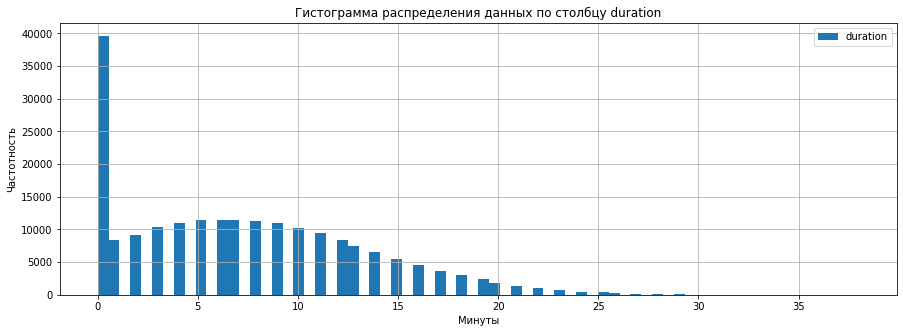

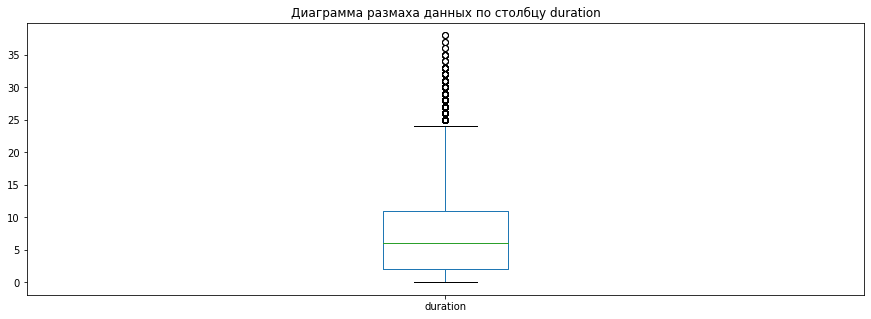

In [11]:
# Проверим данные о длительности звонков.
describe_me(data_calls, 'duration', 'Минуты')

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

0.00      19598
197.56        9
447.30        9
335.91        9
108.95        8
          ...  
72.49         1
846.22        1
429.17        1
899.03        1
483.87        1
Name: mb_used, Length: 70003, dtype: int64

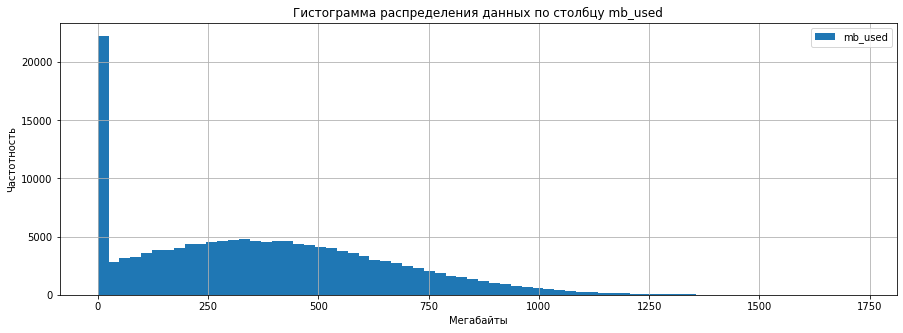

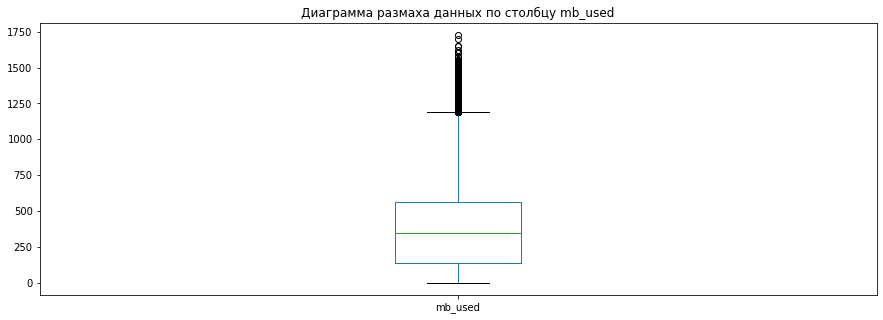

In [12]:
# Проверим данные об использовании интернет-трафика.
describe_me(data_internet, 'mb_used', 'Мегабайты')

In [13]:
# Еще раз взглянем на сделанное.
datasets = [data_calls, data_internet, data_messages, data_tariffs, data_users]
for i in datasets:
    display(i)
    i.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1,1499
202603,1499_216,2018-10-18,19,1499
202604,1499_217,2018-11-10,11,1499
202605,1499_218,2018-10-06,5,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Вывод

**Пропуски**

* В датасетах **data_calls**, **data_internet**, **data_messages** и **data_tariffs** пропусков нет. В таблице **data_users** пропуски есть в столбце **churn_date**, но проводить их замену или избавляться от них не нужно, так как они имеют смысл (тариф еще действовал на момент выгрузки данных).

* В датасете **data_calls** в столбце **duration** присутствуют нулевые значения. Это не ошибка, а пропущенный вызов.

**Изменение типов данных**

* В таблицах **data_calls**, **data_internet**, **data_messages** и **data_users** форматом даты является `object`. Поменяем его на `datetime`.

* В таблице **data_calls** округлим минуты до целых значений и изменим формат на `int`.

**Наличие дубликатов**

Единственным полем данных, где целесообразно провести поиск дубликатов является столбец **city** таблицы **data_users**. Проверка показала, что дубликатов нет.

**Исследование данных на наличие аномалий**

Изучены данные в таблицах **data_calls** и **data_internet** на предмет наличия аномальных значений (столбцы **duration** и **mb_used** соответственно). Для изучения была написана функция `describe_me`, содержашая методы `describe()`, `value_counts()`, `plot`. Построены гистограммы и диаграммы размаха данных. Анализ показал, что в обоих таблицах данные распределены ненормально - имеется большой пик при нулевом значении. В остальном гистограммы напоминают скошенное вправо нормальное распределение.  
  

Нулевые значения в таблице **data_calls** вероятнее всего образовались при регистрации пропущенных вызовов. Такие значения появляются у абсолютного большинства пользователей. Более того, коллеги обратили наше внимание на это при передаче датасетов для выполнения нашей задачи. Максимальным же значением является 38 минут. Это вполне реальное значение. Что ж, такие данные действительно могут существовать, и они отображают действительность, поэтому удалять/заменять их нецелесообразно.  
  
Нулевые значения в таблице **data_internet** также встречаются у абсолютного большинства пользователей. Вероятнее всего они образовались, потому что в течение этих сессиий было израсходовано настолько небольшое количество трафика (считанные килобайты), что в архив попало значение равное нулю (тем более, что оно фиксируется в Мегабайтах).  
Максимальным значением является 1724 Мб. Это значение вполне реально.  
Нулевые значения в этой выборке действительно могут существовать, и они отображают действительность, поэтому удалять/заменять их нецелесообразно.

## Расчеты и добавление результатов в таблицу

In [14]:
# Для дальнейшей работы нам необходимо объединить таблицы.
# Для удобства объединения дадим столбцам таблиц более специфичные имена.
data_calls = data_calls.rename(columns={'id':'call_id'})
data_internet = data_internet.rename(columns={'id':'session_id'})
data_messages = data_messages.rename(columns={'id':'message_id'})
data_tariffs = data_tariffs.rename(columns = {'tariff_name':'tariff'})

In [15]:
# Начнем объединение. Объединим таблицы data_users и data_tariffs.
data_users_w_tariffs = data_users.merge(data_tariffs, on='tariff')
display(data_users_w_tariffs)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1
2,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,1000,30720,3000,1950,150,1,1
3,1013,36,NaT,Иваново,Борис,Андреенко,2018-11-14,ultra,1000,30720,3000,1950,150,1,1
4,1016,58,NaT,Омск,Марица,Сазонова,2018-11-21,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1494,62,NaT,Омск,Ренат,Андропов,2018-08-17,smart,50,15360,500,550,200,3,3
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart,50,15360,500,550,200,3,3
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart,50,15360,500,550,200,3,3
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,50,15360,500,550,200,3,3


In [16]:
# Создадим сводную таблицу по данным таблицы data_calls.
# Отразим в ней количество сделанных звонков и израсходованных минут 
# разговора по месяцам по каждому пользователю.
# Сначала добавим столбец с месяцем звонка.
data_calls['month'] = pd.DatetimeIndex(data_calls['call_date']).month
# Создадим сводную таблицу.
data_calls_by_user = data_calls.pivot_table(
    index=['user_id','month'], 
    values=['duration'], 
    aggfunc=['count','sum']).reset_index()
# Переименуем названия столбцов.
data_calls_by_user.columns = [
    'user_id', 
    'month', 
    'number_of_calls', 
    'total_call_duration'
]
display(data_calls_by_user)

,user_id,month,number_of_calls,total_call_duration
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
...,...,...,...,...
3169,1498,10,41,247
3170,1499,9,9,70
3171,1499,10,68,449
3172,1499,11,74,612


In [17]:
# Посчитаем для каждого пользователя количество отправленных 
# сообщений по месяцам.
# Добавим в датасет data_messages столбец с месяцем звонка.
data_messages['month'] = pd.DatetimeIndex(
    data_messages['message_date']
).month
# Создадим сводную таблицу по датасету data_messages.
data_messages_by_user = data_messages.pivot_table(
    index=['user_id', 'month'], 
    values='message_id',
    aggfunc='count').reset_index()
# Переименуем стольбец получившейся таблицы.
data_messages_by_user.columns=['user_id', 'month', 'messages_number']
display(data_messages_by_user)

,user_id,month,messages_number
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [18]:
# Посчитаем для каждого пользователя объем 
# израсходованного трафика по месяцам.
# Добавим в датасет data_internet столбец с месяцем сессии.
data_internet['month'] = pd.DatetimeIndex(
    data_internet['session_date']
).month
# Создадим сводную таблицу по датасету data_internet.
data_internet_by_user = data_internet.pivot_table(
    index=['user_id', 'month'], 
    values='mb_used',
    aggfunc='sum').reset_index()
# Переименуем столбец получившейся таблицы.
data_internet_by_user.columns=['user_id', 'month', 'gb_used_total']
# Округлим мегабайты до гигабайтов.
def gb(mb):
    result = mt.ceil(mb / 1024)
    return result

data_internet_by_user['gb_used_total'] = data_internet_by_user[
    'gb_used_total'].apply(gb)
display(data_internet_by_user)

,user_id,month,gb_used_total
0,1000,5,3
1,1000,6,23
2,1000,7,14
3,1000,8,14
4,1000,9,15
...,...,...,...
3198,1498,10,21
3199,1499,9,2
3200,1499,10,18
3201,1499,11,18


In [19]:
# Теперь объединим друг с другом таблицы data_users_w_tariffs, 
# data_calls_by_user, data_messages_by_user и data_internet_by_user.
data_by_user = data_calls_by_user.merge(
    data_messages_by_user, on=['user_id','month'], how='outer')
data_by_user_internet = data_by_user.merge(
    data_internet_by_user, on=['user_id','month'], how='outer')
data = data_by_user_internet.merge(
    data_users_w_tariffs, on='user_id', how='left')
display(data)

,user_id,month,number_of_calls,total_call_duration,messages_number,gb_used_total,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,159.0,22.0,3.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43.0,172.0,60.0,23.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47.0,340.0,75.0,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52.0,408.0,81.0,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58.0,466.0,57.0,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,32.0,17.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3210,1489,10,NaN,NaN,21.0,20.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3211,1489,11,NaN,NaN,20.0,18.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3212,1489,12,NaN,NaN,35.0,17.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3


In [20]:
# В новой таблице data избавимся от пропусков в столбцах number_of_calls, 
# messages_number, gb_used_total.
# В этих же столбцах поменяем тип данных на int (после замены пропусков на 0).
data = data.fillna(
    {
        'total_call_duration':0,
        'number_of_calls':0, 
        'messages_number':0, 
        'gb_used_total':0
    }
).astype(
    {
        'total_call_duration': 'int',
        'number_of_calls':'int',
          'messages_number':'int', 
          'gb_used_total':'int'
    }
        )
# И теперь переведем в столбце mb_per_month_included Мегабайты 
# в Гигабайты (переименовав также название столбца).
data['mb_per_month_included'] = (
    data['mb_per_month_included'] / 1024
).astype('int')
data = data.rename(
    columns={'mb_per_month_included':'gb_per_month_included'}
)
display(data)

,user_id,month,number_of_calls,total_call_duration,messages_number,gb_used_total,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22,159,22,3,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
1,1000,6,43,172,60,23,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
2,1000,7,47,340,75,14,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
3,1000,8,52,408,81,14,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
4,1000,9,58,466,57,15,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,0,0,32,17,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15,500,550,200,3,3
3210,1489,10,0,0,21,20,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15,500,550,200,3,3
3211,1489,11,0,0,20,18,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15,500,550,200,3,3
3212,1489,12,0,0,35,17,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15,500,550,200,3,3


In [21]:
# Посчитаем помесячную выручку с каждого пользователя.
# Для этого напишем функцию earning.
def earning(row):
    duration_used = row['total_call_duration']
    messages_used = row['messages_number']
    gb_used = row['gb_used_total']
    minutes_limit = row['minutes_included']
    messages_limit = row['messages_included']
    gb_limit = row['gb_per_month_included']
    monthly_fee = row['rub_monthly_fee']
    rub_per_minute = row['rub_per_minute']
    rub_per_message = row['rub_per_message']
    rub_per_gb = row['rub_per_gb']
    
    if duration_used <= minutes_limit:
        minutes_earnings = 0
    else: 
        minutes_earnings = (
            (duration_used - minutes_limit) * rub_per_minute
        )
    
    if messages_used <= messages_limit:
        messages_earnings = 0
    else: 
        messages_earnings = (
            (messages_used - messages_limit) * rub_per_message
        )
    
    if gb_used <= gb_limit:
        gb_earnings = 0
    else: 
        gb_earnings = (gb_used - gb_limit) * rub_per_gb
    
    total_earnings = (minutes_earnings + messages_earnings + 
    gb_earnings + monthly_fee)
    
    return total_earnings

# Функция готова. Добавим новый столбец и внесем в него результаты расчета.
data['rub_earnings'] = data.apply(earning, axis=1)
display(data)

,user_id,month,number_of_calls,total_call_duration,messages_number,gb_used_total,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,rub_earnings
0,1000,5,22,159,22,3,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30,3000,1950,150,1,1,1950
1,1000,6,43,172,60,23,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30,3000,1950,150,1,1,1950
2,1000,7,47,340,75,14,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30,3000,1950,150,1,1,1950
3,1000,8,52,408,81,14,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30,3000,1950,150,1,1,1950
4,1000,9,58,466,57,15,52,NaT,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30,3000,1950,150,1,1,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,0,0,32,17,35,NaT,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15,500,550,200,3,3,950
3210,1489,10,0,0,21,20,35,NaT,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15,500,550,200,3,3,1550
3211,1489,11,0,0,20,18,35,NaT,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15,500,550,200,3,3,1150
3212,1489,12,0,0,35,17,35,NaT,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15,500,550,200,3,3,950


### Вывод

Нами проведена обширная работа по компановке данных и расчетам:

1. Для удобства работы с данными и последующего объединения таблиц переименованы столбцы в исходных датасетах. Даны более конкретные названия. **Например,** в датасете **data_calls** столбец **id** переименован в **call_id**. В датасете **data_internet** столбец **id** переименован в **session_id**.
2. В таблицах **data_calls**, **data_internet**, **data_messages** добавлены столбцы с месяцами операций. Таблицы перегруппированы. Сделаны сводные таблицы с разбивкой по пользователям и месяцам. Для удобства в полученных сводных таблицах переименованы мульти-индекс-столбцы. Отметим, что в сводной таблице по датасету **data_internet** при помощи функции **gb** использованные мегабайты переведены в гигабайты с округлением в большую сторону.
3. Все таблицы объединены друг с другом по столбцу **user_id**. Образовавшиеся **NaN-значения** заменены на 0. Все данные формата **float** переведены в формат **int**. Данные столбца **mb_per_month_included** переведены в гигабайты. Название данного столбца переименовано на **gb_per_month_included**.
4. Мы создали функцию earnings, позволившуюю нам посчитать помесячную выручку с каждого пользователя. Результаты расчета представлены в столбце **rub_earnings**.

Приступим к анализу данных.

## Анализ данных

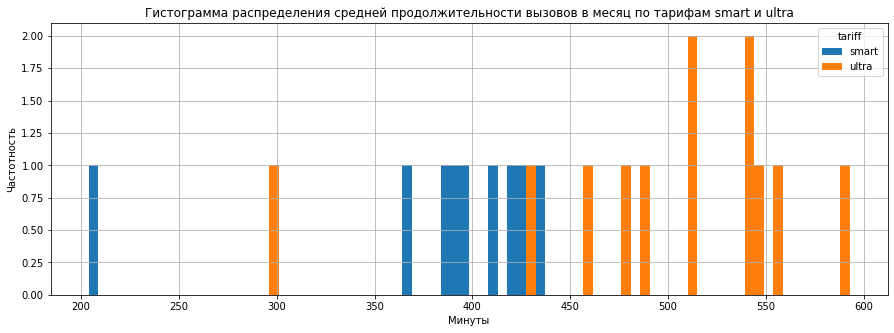

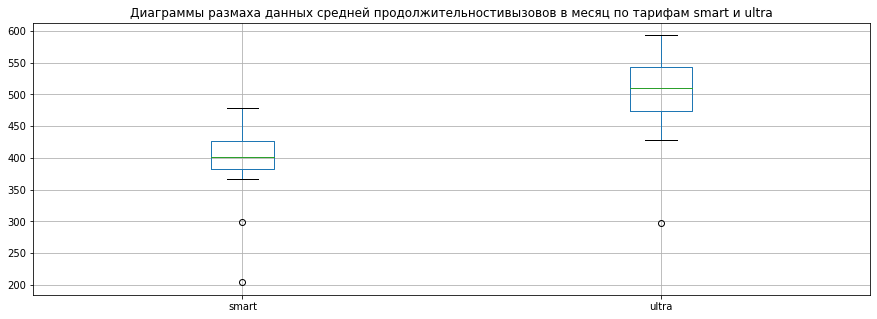

tariff,smart,ultra
month,,
1,203.852941,428.111111
2,298.689655,297.125000
3,390.051948,489.648649
4,367.133929,458.018182
5,387.361702,510.328358
6,395.640244,479.702381
7,408.353234,545.791209
8,421.468085,510.775701
9,428.611538,539.443478


In [22]:
# Для анализа данных создадим ряд сводных таблиц.
# Посчитаем среднее значение потраченных минут 
# разговора в месяц для каждого тарифа.
data_grouped_call = data.pivot_table(
    index='month', columns='tariff',
    values='total_call_duration'
)
# Теперь посчитаем дисперсию и стандартное отклонение.
variance_call = pd.Series(
    {'smart':np.var(data_grouped_call['smart'], ddof=1),
     'ultra':np.var(data_grouped_call['ultra'], ddof=1)},
      name='Дисперсия'
)
standard_deviation_call = pd.Series(
    {'smart':np.std(data_grouped_call['smart'], ddof=1),
     'ultra':np.std(data_grouped_call['ultra'], ddof=1)},
      name='Стандартное отклонение')
mean_call = pd.Series({'smart':data_grouped_call['smart'].mean(),
                                'ultra':data_grouped_call['ultra'].mean()},
                               name='Среднее значение')
# Построим гистограмму распределения средней продолжительности 
# вызовов в месяц по тарифам smart и ultra.
data_grouped_call.plot(kind='hist',
                  grid=True,
                  bins=80,
                  figsize=(15,5)
                 )
plt.title('Гистограмма распределения средней продолжительности' +
          ' вызовов в месяц по тарифам smart и ultra')
plt.xlabel('Минуты')
plt.ylabel('Частотность')
plt.show()
data_grouped_call.plot(kind='box',
                  grid=True,
                  figsize=(15,5)
                 )
plt.title('Диаграммы размаха данных средней продолжительности' + 
          'вызовов в месяц по тарифам smart и ultra')
plt.show()
# Для наглядности добавим к таблице data_grouped_call 
# значения дисперсии и стандартного отклонения.
parameters_call = [variance_call, standard_deviation_call, mean_call]
for i in parameters_call:
    data_grouped_call = data_grouped_call.append(i)
display(data_grouped_call)


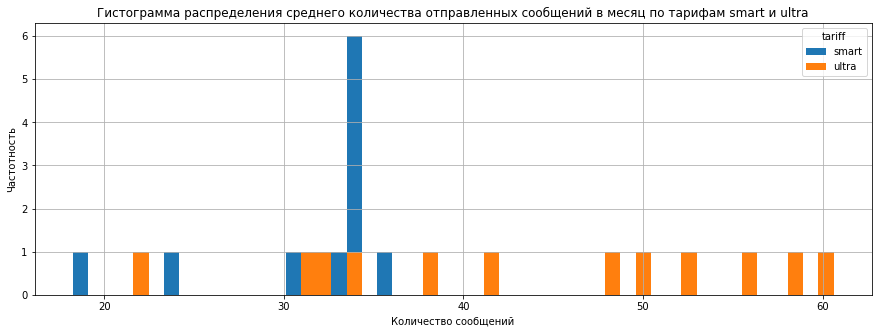

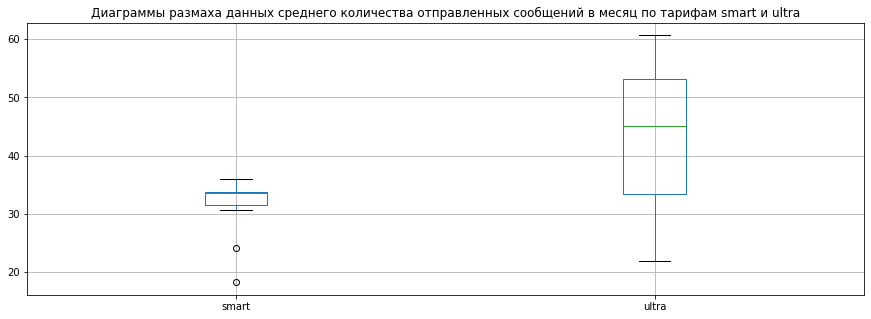

tariff,smart,ultra
month,,
1,18.235294,33.777778
2,24.086207,21.958333
3,31.857143,32.297297
4,30.741071,31.563636
5,33.773050,37.850746
6,33.402439,41.726190
7,33.751244,49.846154
8,33.638298,48.439252
9,33.638462,52.286957


In [23]:
# Посчитаем среднее значение отправленных сообщений в месяц 
# для каждого тарифа.
data_grouped_message = data.pivot_table(
    index='month', columns='tariff',
    values='messages_number'
)
# Теперь посчитаем дисперсию и стандартное отклонение.
variance_message = pd.Series(
    {'smart':np.var(data_grouped_message['smart'], ddof=1),
     'ultra':np.var(data_grouped_message['ultra'], ddof=1)},
      name='Дисперсия'
)
standard_deviation_message = pd.Series(
    {'smart':np.std(data_grouped_message['smart'], ddof=1),
     'ultra':np.std(data_grouped_message['ultra'], ddof=1)},
      name='Стандартное отклонение')
mean_message = pd.Series(
    {'smart':data_grouped_message['smart'].mean(),
     'ultra':data_grouped_message['ultra'].mean()},
      name='Среднее значение')
# Построим гистограмму распределения средней продолжительности 
# вызовов в месяц по тарифам smart и ultra.
data_grouped_message.plot(kind='hist',
                  grid=True,
                  bins=50,
                  figsize=(15,5)
                 )
plt.title('Гистограмма распределения среднего количества' + 
          ' отправленных сообщений в месяц по тарифам smart и ultra')
plt.xlabel('Количество сообщений')
plt.ylabel('Частотность')
plt.show()
data_grouped_message.plot(kind='box',
                  grid=True,
                  figsize=(15,5)
                 )
plt.title('Диаграммы размаха данных среднего количества' +  
          ' отправленных сообщений в месяц по тарифам smart и ultra')
plt.show()
# Для наглядности добавим к таблице data_grouped_message 
# значения дисперсии и стандартного отклонения.
parameters_message = [
    variance_message, 
    standard_deviation_message, 
    mean_message
]
for i in parameters_message:
    data_grouped_message = data_grouped_message.append(i)
display(data_grouped_message)

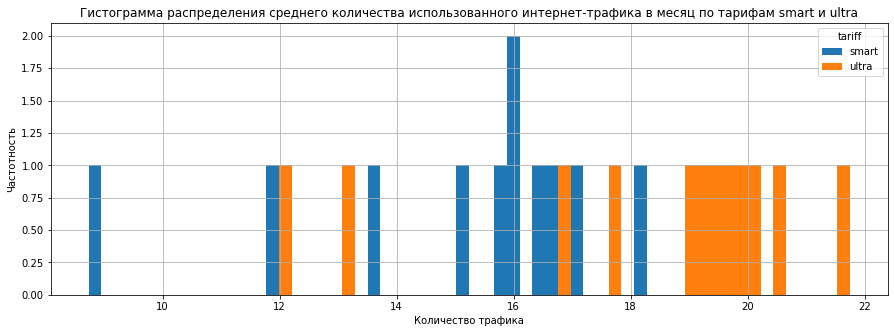

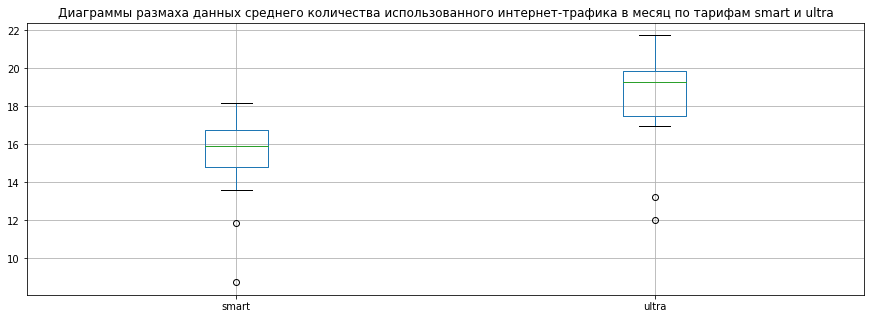

tariff,smart,ultra
month,,
1,8.735294,13.222222
2,11.844828,12.000000
3,15.233766,17.648649
4,13.625000,16.963636
5,15.907801,19.373134
6,15.951220,18.940476
7,15.875622,20.505495
8,16.736170,19.598131
9,16.392308,19.243478


In [24]:
# Посчитаем среднее значение использованного интернет-трафика 
# в месяц для каждого тарифа.
data_grouped_gb = data.pivot_table(
    index='month', columns='tariff',
    values='gb_used_total'
)
# Теперь посчитаем дисперсию и стандартное отклонение.
variance_gb = pd.Series(
    {'smart':np.var(data_grouped_gb['smart'], ddof=1),
     'ultra':np.var(data_grouped_gb['ultra'], ddof=1)}, 
      name='Дисперсия')
standard_deviation_gb = pd.Series(
    {'smart':np.std(data_grouped_gb['smart'], ddof=1),
     'ultra':np.std(data_grouped_gb['ultra'], ddof=1)},
      name='Стандартное отклонение')
mean_gb = pd.Series(
    {'smart':data_grouped_gb['smart'].mean(),
     'ultra':data_grouped_gb['ultra'].mean()},
      name='Среднее значение')
# Построим гистограмму распределения средней продолжительности 
# вызовов в месяц по тарифам smart и ultra.
data_grouped_gb.plot(kind='hist',
                  grid=True,
                  bins=60,
                  figsize=(15,5)
                 )
plt.title('Гистограмма распределения среднего количества использованного' + 
          ' интернет-трафика в месяц по тарифам smart и ultra')
plt.xlabel('Количество трафика')
plt.ylabel('Частотность')
plt.show()
data_grouped_gb.plot(kind='box',
                  grid=True,
                  figsize=(15,5)
                 )
plt.title('Диаграммы размаха данных среднего количества использованного' + 
          ' интернет-трафика в месяц по тарифам smart и ultra')
plt.show()
# Для наглядности добавим к таблице data_grouped_message
# значения дисперсии и стандартного отклонения.
parameters_gb = [variance_gb, standard_deviation_gb, mean_gb]
for i in parameters_gb:
    data_grouped_gb = data_grouped_gb.append(i)
display(data_grouped_gb)

### Вывод

Мы провели анализ поведения пользователей тарифов Smart и Ultra по представленной выборке. Анализ выборки показал следующее.

<u>**Тариф Smart:**</u>

**1. Продолжительность вызовов**  
Пользователи тарифа Smart в среднем за год говорят 365 минут в месяц, что не превышает предельное тарифное значение. Чаще всего они говорят от 340 до 410 минут в месяц. Меньше всего пользователи тарифа говорили в январе (193 минуты). Больше всего в декабре (451 минута). Любопытно, что в целом, начиная с января, среднее количество минут разговора в месяц непременно растет и достигает своего пика в декабре. Максимальное значение в декабре можно объяснить надвигающимися новогодними праздниками и, как следствие, повышенной потребностью людей в сотовой связи, необходимой для решения накопившихся к концу года рабочих задач, а также для поздравлений с Новым Годом :)  
Минимальное значение в январе можно объяснить снижением потребности в сотовой связи в связи с длинными новогодними каникулами.  
Дисперсия составила 4599 кв. мин. Стандартное отклонение составило 67,8 мин. Гистограмма оказалось скошенной влево, и это говорит о том, что медиана больше среднего.
  
**2. СМС-сообщения**  
Пользователи тарифа Smart в среднем за год отправляют 31 сообщение в месяц, что не превышает предельное тарифное значение. Чаще всего они отправляют 33-34 сообщения в месяц. Меньше всего пользователи тарифа отправляли сообщения в январе (18 сообщений). Больше всего в декабре (36 сообщений). Причины, по которым минимальное и максимальное значения показали январь и декабрь соответственно аналогичны причинам, описанным выше в разделе "Продолжительность вызовов".  
Дисперсия составила 26 кв. шт. Стандартное отклонение составило 5,1 шт. Гистограмма оказалась скошенной влево, и это говорит о том, что медиана больше среднего.  

**3. Интернет-трафик**  
Пользователи тарифа Smart в среднем за год пользуются в месяц 15,2 Гб интернет-трафика, что превышает предельное тарифное значение. Чаще всего они пользуются 15-16 Гб интернет-трафика в месяц. Меньше всего пользователи тарифа пользовались трафиком в январе (8,7 Гб). Больше всего в декабре (18,2 Гб). Причины, по которым минимальное и максимальное значения показали январь и декабрь соответственно аналогичны причинам, описанным выше в разделе "Продолжительность вызовов".  
Дисперсия составила 6,9 кв. Гб. Стандартное отклонение составило 2,6 Гб. Гистограмма оказалась скошенной влево, и это говорит о том, что медиана больше среднего.  
  
  <u>**Тариф Ultra:**</u>

**1. Продолжительность вызовов**  
Пользователи тарифа Ultra в среднем за год говорят 468 минут в месяц, что не превышает предельное тарифное значение. Чаще всего они говорят от 475 до 510 минут в месяц. Меньше всего пользователи тарифа говорили в феврале (280 минут). Больше всего в декабре (560 минута). Максимальное значение в декабре по-прежнему можно объяснить надвигающимися новогодними праздниками. Средние значения других месяцев на данном этапе исследования объяснить затруднительно. Стоит отметить, что пользователи используют не более 20 % от общего тарифного лимита.
Дисперсия составила 5342,7 кв. мин. Стандартное отклонение составило 73,1 мин. Гистограмма оказалась скошенной влево, и это говорит о том, что медиана больше среднего.  
  
**2. СМС-сообщения**  
Пользователи тарифа Ultra в среднем за год отправляют 44 сообщения в месяц, что не превышает предельное тарифное значение. Чаще всего они отправляют 32 или 50 сообщений в месяц. Меньше всего пользователи тарифа отправляли сообщения в феврале (22 сообщений). Больше всего в декабре (61 сообщений).   
Дисперсия составила 151,8 кв. шт. Стандартное отклонение составило 12,3 шт. Гистограмма оказалось скошенной вправо, и это говорит о том, что медиана меньше среднего.

**3. Интернет-трафик**  
Пользователи тарифа Ultra в среднем за год пользуются в месяц 18,3 Гб интернет-трафика, что не превышает предельное тарифное значение. Чаще всего они пользуются 19-20 Гб интернет-трафика в месяц. Меньше всего пользователи тарифа пользовались трафиком в феврале (12 Гб). Больше всего в декабре (21,7 Гб).  
Дисперсия составила 8,5 кв. Гб. Стандартное отклонение составило 2,9 Гб. Гистограмма оказалась скошенной влево, и это говорит о том, что медиана больше среднего.  
  


## Проверка гипотез

In [25]:
# Различается ли средняя выручка пользователей тарифов Ultra и Smart?
# У нас есть две генеральные совокупности (Ultra, Smart). 
# Сопоставим их средние.
# Подготовим массивы данных.
# Начнем с выручки пользователей тарифа Smart.
data_smart = data.loc[data['tariff'] == 'smart', 'rub_earnings']
# Посчитаем среднее значение выборки
data_smart_mean = data_smart.mean()
# Теперь выручка пользователей тарифа Ultra
data_ultra = data.loc[data['tariff'] == 'ultra', 'rub_earnings']
# Посчитаем среднее значение выборки
data_ultra_mean = data_ultra.mean()
print('Срендее значение выручки пользователей',
      ' тарифа Smart данной выборки:', data_smart_mean)
print('Срендее значение выручки пользователей',
      ' тарифа Ultra данной выборки:', data_ultra_mean)
# Сравним дисперсии выборок. 
# Это необходимо сделать, чтобы понять 
# обладают ли две генеральные совокупности.
# примерно одинаковыми дисперсиями. Воспользуемся тестом Левене.
# Сформулируем нулевую гипотезу: дисперсии двух генеральных 
# совокупностей равны.
# Сформулируем альтернативную гипотезу: 
# дисперсии двух генеральных совокупностей различаются.
# Значением alpha будет 0.05
alpha = .05
stat, p = levene(data_smart, data_ultra)
print()
print('p-значение:', p)
if p < alpha:
    print('Отвергаем нулевую гипотезу. Стоит указать equal_var=False')
else:
    print('Не получилось отвергнуть нулевую гипотезу.' + 
          ' Стоит указать equal_var=True')

# Сформулируем нулевую гипотезу: средние выручки пользователей
# тарифов Ultra и Smart не различаются.
# Сформулируем альтернативную гипотезу: средние выручки 
# пользователей тарифов Ultra и Smart различаются.
# Зададим критический уровень статистической значимости.
alpha = .05
results = st.ttest_ind(data_smart, data_ultra, equal_var=False)
print()
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Срендее значение выручки пользователей  тарифа Smart данной выборки: 1289.9735307312696
Срендее значение выручки пользователей  тарифа Ultra данной выборки: 2070.1522842639592

p-значение: 1.8783148636310733e-122
Отвергаем нулевую гипотезу. Стоит указать equal_var=False

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


In [26]:
# Различается ли средняя выручка пользователей из Москвы
# от средней выручки пользователей других регионов?
# У нас есть две генеральные совокупности (Москва, другие). 
# Сопоставим их средние.
# Подготовим массивы данных.
# Начнем с выручки пользователей, живущих в Москве.
data_moscow = data.loc[data['city'] == 'Москва', 'rub_earnings']
# Посчитаем среднее значение выборки
data_moscow_mean = data_moscow.mean()
# Теперь выручка пользователей, живущих в других регионах
data_other = data.loc[data['city'] != 'Москва', 'rub_earnings']
# Посчитаем среднее значение выборки
data_other_mean = data_other.mean()
print('Срендее значение выручки пользователей, ',
      'живущих в Москве, данной выборки:', data_moscow_mean)
print('Срендее значение выручки пользоватданной,' ,
      ' живущих в других регионах, данной выборки:', data_other_mean)
# Сравним дисперсии выборок. Это необходимо сделать, 
# чтобы понять обладают ли две генеральные совокупности
# примерно одинаковыми дисперсиями. Воспользуемся тестом Левене.
# Сформулируем нулевую гипотезу: дисперсии двух генеральных 
# совокупностей равны.
# Сформулируем альтернативную гипотезу: дисперсии двух генеральных 
# совокупностей различаются.
# Значением alpha будет 0.05
alpha = .05
stat, p = levene(data_moscow, data_other)
print()
print('p-значение:', p)
if p < alpha:
    print('Отвергаем нулевую гипотезу. Стоит указать equal_var=False')
else:
    print('Не получилось отвергнуть нулевую гипотезу.',
          ' Стоит указать equal_var=True')
# Сформулируем нулевую гипотезу: средние выручки пользователей, 
# живущих в Москве и в других регионах, не различаются.
# Сформулируем альтернативную гипотезу: средние выручки пользователей, 
# живущих в Москве и в других регионах, различаются.
# Зададим критический уровень статистической значимости
alpha = .05
results = st.ttest_ind(data_moscow, data_other, equal_var=False)
print()
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Срендее значение выручки пользователей,  живущих в Москве, данной выборки: 1546.7135842880523
Срендее значение выручки пользоватданной,  живущих в других регионах, данной выборки: 1524.9362274298885

p-значение: 0.014082487123270156
Отвергаем нулевую гипотезу. Стоит указать equal_var=False

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


### Вывод

Перед нами стояла задача проверить две гипотезы:  
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
* средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов

Мы определили, что обе гипотезы являются двухсторонними гипотезами о равенстве средних двух генеральных совокупностей. 
Для каждого случая мы определили нулевую и альтернативную гипотезы, и после этого провели расчет, в котором сравнили уровень p-value с уровнем значимости 5 %.  
  
**<u>Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются</u>**  
**H<sub>0</sub>:** средние выручки пользователей тарифов Ultra и Smart не различаются.  
**H<sub>1</sub>:** средние выручки пользователей тарифов Ultra и Smart различаются.
  
**<u>Средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов</u>**  
**H<sub>0</sub>:** средние выручки пользователей, живущих в Москве и в других регионах, не различаются.  
**H<sub>1</sub>:** средние выручки пользователей, живущих в Москве и в других регионах, различаются.  

  
**Результаты расчетов**  
* Нулевая гипотеза "средние выручки пользователей тарифов Ultra и Smart не различаются" была нами отвергнута, так как уровень P-value оказался существенно меньше уровня значимости 5 %. **<u>По всей видимости, средние выручки пользователей тарифов Ultra и Smart различаются.</u>**  
* Нам не удалось отвергнуть нулевую гипотезу "средние выручки пользователей, живущих в Москве и в других регионах, не различаются", так как уровень P-value оказался существенно выше уровня значимости 5 %. **<u>По всей видимости, несмотря на разницу в средних значениях, в почти половине случаев такое различие получится случайно. Мы не исключаем того, что средние выручки пользователей, живущих в Москве и в других регионах, действительно не различаются.</u>**  

## Общий вывод

Нашей задачей было сделать предварительный анализ тарифов на небольшой выборке клиентов и сделать вывод — какой тариф лучше, поняв, какой из них приносит больше выручки. Это поможет компании принять решение в корректировке рекламного бюджета.  
Что нам удалось сделать?  
1. Мы изучили входные датасеты, обработали их и в результате сделали одну общую таблицу, содержащую всю необходимую информацию для дальнейшего анализа.  
2. Мы посчитали данные о выручке с каждого пользователя, представленного в выборке, и тем самым обогатили анализируемые данные. Выручка является ключевым фактором для проведения анализа.  
3. Мы оценили поведение пользователей двух тарифов. Оказалось, что по данной выборке пользователи тарифа Ultra пользуются услугами связи больше, чем пользователи тарифа Smart. При анализе использовались средние значения за каждый месяц 2018 год. При этом пользователи обоих тарифов редко превышают установленные лимиты объемов услуг связи. Так, превышение в данной выборке было зафиксировано только в части использования интернет-трафика пользователей тарифа Smart. Стоит провести дополнительный статистический анализ, по результатам которого можно будет предпологать о сформировавшемся клиентском запросе на увеличение лимита, и по итогам анализа рассмотреть вариант повышения лимита расхода интернет-трафика данного тарифа с соответсвующим увеличением его абонентской платы.  
4. Мы рассмотрели две основные гипотезы, позволяющие ответить на главный вопрос исследования. По результатам рассмотрения мы сделали выводы, что скорее всего средние выручки пользователей тарифов Smart и Ultra различаются, при чем скорее всего выручка тарифа Ultra больше выручки тарифа Smart. Также мы выяснили, что скорее всего средние выручки пользователей, живущих в Москве и в других регионах, не различаются.   
  
  Эти два вывода позволяют нам дать рекомендацию коммерческому департаменту, что на данном этапе анализа **стоит увеличить рекламный бюджет тарифа Ultra, как тарифа скорее всего приносящего по всей стране выручку больше, чем тариф Smart.**